In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [16]:
collisions = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

In [17]:
# http://www.zipmap.net/New_York/Queens_County.htm 
astoria_zips = [11102, 11103, 11105]

def is_astoria(x):
    if x in astoria_zips:
        return 1
    else: 
        return 0
    
collisions['IS_ASTORIA'] = collisions['ZIP CODE'].apply(is_astoria)


def what_year(x):
    return (str(x))[-4:]

collisions['YEAR'] = collisions['DATE'].apply(what_year)

In [18]:
queens = collisions[collisions['BOROUGH'] == 'QUEENS']

In [21]:
astoria = collisions[collisions['IS_ASTORIA'] == 1]

In [24]:
astoria.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'IS_ASTORIA', 'YEAR'],
      dtype='object')

In [19]:
collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                       497253
Driver Inattention/Distraction    103720
Fatigued/Drowsy                    48129
Failure to Yield Right-of-Way      35922
Other Vehicular                    27561
Backing Unsafely                   23291
Turning Improperly                 21240
Lost Consciousness                 19990
Prescription Medication            15874
Traffic Control Disregarded        10451
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [20]:
queens['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                       98946
Driver Inattention/Distraction    22303
Failure to Yield Right-of-Way      9793
Fatigued/Drowsy                    6336
Backing Unsafely                   5473
Prescription Medication            3132
Lost Consciousness                 2963
Physical Disability                2605
Other Vehicular                    2527
Traffic Control Disregarded        2066
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [23]:
astoria['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                       3967
Driver Inattention/Distraction     570
Failure to Yield Right-of-Way      361
Fatigued/Drowsy                    215
Backing Unsafely                   211
Lost Consciousness                 149
Prescription Medication            115
Physical Disability                100
Driver Inexperience                 61
Alcohol Involvement                 50
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

# Let's focus on "serious collisions" -- where at least one person was either injured and/or killed

In [25]:
serious_collisions = collisions[(collisions['NUMBER OF PERSONS KILLED'] > 0) | (collisions['NUMBER OF PERSONS INJURED'] > 0)]

In [26]:
serious_queens_collisions = queens[(queens['NUMBER OF PERSONS KILLED'] > 0) | (queens['NUMBER OF PERSONS INJURED'] > 0)]

In [27]:
serious_astoria_collisions = astoria[(astoria['NUMBER OF PERSONS KILLED'] > 0) | (astoria['NUMBER OF PERSONS INJURED'] > 0)]

In [28]:
serious_queens_collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                       17740
Driver Inattention/Distraction     4543
Failure to Yield Right-of-Way      2957
Fatigued/Drowsy                    1044
Physical Disability                 952
Traffic Control Disregarded         702
Prescription Medication             459
Passenger Distraction               446
Alcohol Involvement                 415
Other Vehicular                     390
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [29]:
serious_astoria_collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                       667
Failure to Yield Right-of-Way     115
Driver Inattention/Distraction    105
Fatigued/Drowsy                    40
Physical Disability                40
Prescription Medication            20
Traffic Control Disregarded        18
Driver Inexperience                13
Passenger Distraction              13
Lost Consciousness                 12
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

The majority of collisions are coded as "Unspecified" -- however, the two most common contributing factors to both serious and non-serious collisions are **"Failure to Yield Right-of-Way"** and **"Driver Inattention/Distraction."**

# Off the serious collisions, let's only look at cyclists

In [33]:
queens_cyclists = serious_queens_collisions[(serious_queens_collisions['NUMBER OF CYCLIST KILLED'] > 0) | (serious_queens_collisions['NUMBER OF CYCLIST INJURED'] > 0)]

In [34]:
queens_cyclists['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                       1758
Driver Inattention/Distraction     570
Failure to Yield Right-of-Way      279
Passenger Distraction              221
Physical Disability                 69
Lost Consciousness                  43
Other Vehicular                     36
Prescription Medication             34
Traffic Control Disregarded         33
Driver Inexperience                 26
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [31]:
astoria_cyclists = serious_astoria_collisions[(serious_astoria_collisions['NUMBER OF CYCLIST KILLED'] > 0) | (serious_astoria_collisions['NUMBER OF CYCLIST INJURED'] > 0)]

In [32]:
astoria_cyclists['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                             133
Driver Inattention/Distraction           29
Failure to Yield Right-of-Way            23
Passenger Distraction                     8
Prescription Medication                   5
Lost Consciousness                        5
Other Vehicular                           4
Physical Disability                       4
Reaction to Other Uninvolved Vehicle      3
Illness                                   3
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [ ]:
# proportion of accidents coded as each in Astoria specifically
# what streets are most dangerous? 
# 

# Number of Collisions with Cyclist Injury or Death in Queens

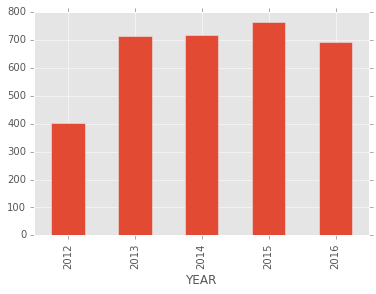

In [37]:
queens_cyclists.groupby('YEAR')['UNIQUE KEY'].count().plot(kind="bar")

In [39]:
queens_cyclists_bytime = queens_cyclists.copy()

In [41]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

In [42]:
queens_cyclists_bytime['dt_str'] = queens_cyclists_bytime['DATE'] + " " + queens_cyclists_bytime['TIME']
queens_cyclists_bytime['datetime'] = queens_cyclists_bytime['dt_str'].apply(parse_date)
queens_cyclists_bytime.index = queens_cyclists_bytime['datetime']

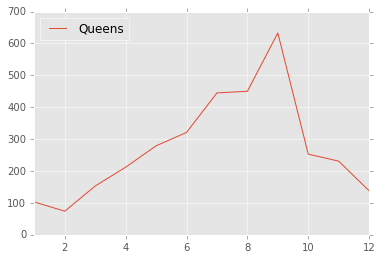

In [43]:
queens_cyclists_bytime.groupby(by=queens_cyclists_bytime.index.month).count().plot(y='UNIQUE KEY', label='Queens')

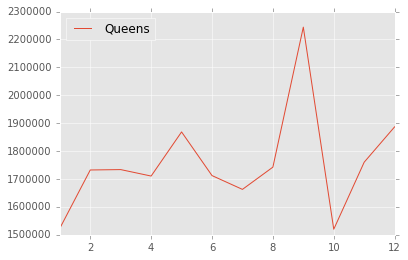

In [131]:
queens_cyclists_bytime.groupby(by=queens_cyclists_bytime.index.month).mean().plot(y='UNIQUE KEY', label='Queens')

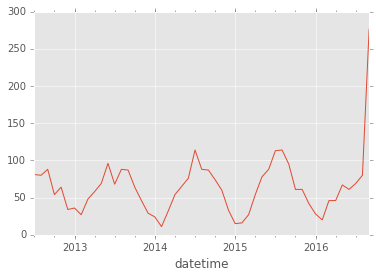

In [44]:
queens_cyclists_bytime['UNIQUE KEY'].resample('M').count().plot()

In [61]:
queens_cyclists_2014 = queens_cyclists_bytime["2014"]
queens_cyclists_2015 = queens_cyclists_bytime["2015"]
queens_cyclists_2016 = queens_cyclists_bytime["2016"]


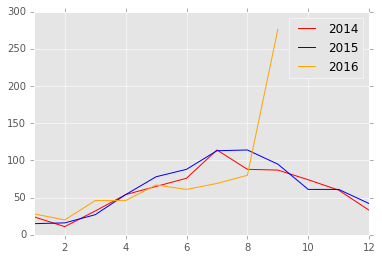

In [62]:
ax = queens_cyclists_2014.groupby(by=queens_cyclists_2014.index.month).count().plot(y='UNIQUE KEY', color='red', label="2014")
queens_cyclists_2015.groupby(by=queens_cyclists_2015.index.month).count().plot(y='UNIQUE KEY', color='blue', label="2015", ax=ax)
queens_cyclists_2016.groupby(by=queens_cyclists_2016.index.month).count().plot(y='UNIQUE KEY', color='orange', label="2016", ax=ax)

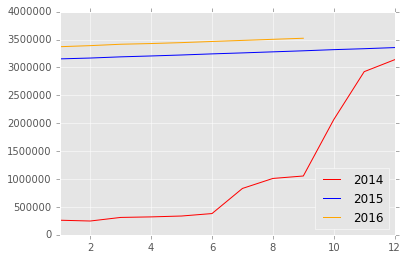

In [132]:
ax = queens_cyclists_2014.groupby(by=queens_cyclists_2014.index.month).mean().plot(y='UNIQUE KEY', color='red', label="2014")
queens_cyclists_2015.groupby(by=queens_cyclists_2015.index.month).mean().plot(y='UNIQUE KEY', color='blue', label="2015", ax=ax)
queens_cyclists_2016.groupby(by=queens_cyclists_2016.index.month).mean().plot(y='UNIQUE KEY', color='orange', label="2016", ax=ax)

# There were an exceptional number of collisions involving cyclist injury or death THIS month in Queens. Really weird.

In [91]:
queens_cyclists_092016 = queens_cyclists_2016["2016-09"]

In [92]:
queens_cyclists_092016['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Unspecified                                              81
Driver Inattention/Distraction                           65
Failure to Yield Right-of-Way                            42
Following Too Closely                                    19
Traffic Control Disregarded                              11
Reaction to Other Uninvolved Vehicle                      6
Turning Improperly                                        6
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     5
Backing Unsafely                                          5
Other Vehicular                                           4
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [93]:
queens_cyclists_092016['ON STREET NAME'].value_counts().sort_values(ascending=False).head(20)

HILLSIDE AVENUE          6
SOUTH CONDUIT AVENUE     6
QUEENS BOULEVARD         6
34 AVENUE                5
METROPOLITAN AVENUE      5
NORTHERN BOULEVARD       5
118 AVENUE               4
ROCKAWAY BOULEVARD       4
BREWER BOULEVARD         3
150 STREET               3
ROOSEVELT AVENUE         3
FOCH BOULEVARD           3
LIBERTY AVENUE           3
31 AVENUE                3
SPRINGFIELD BOULEVARD    3
MYRTLE AVENUE            3
FARMERS BOULEVARD        2
21 STREET                2
BROADWAY                 2
80 STREET                2
Name: ON STREET NAME, dtype: int64

In [94]:
queens_cyclists_092016['CROSS STREET NAME'].value_counts().sort_values(ascending=False).head(20)

73 AVENUE                3
BREWER BOULEVARD         3
217 STREET               3
35 AVENUE                3
33 STREET                2
111 STREET               2
WOODWARD AVENUE          2
WOODHAVEN BOULEVARD      2
QUEENS BOULEVARD         2
MURDOCK AVENUE           2
36 AVENUE                2
ASTORIA BOULEVARD        2
CYPRESS AVENUE           2
98 STREET                2
METROPOLITAN AVENUE      2
FARMERS BOULEVARD        2
91 AVENUE                2
95 AVENUE                2
LEFFERTS BOULEVARD       2
SPRINGFIELD BOULEVARD    2
Name: CROSS STREET NAME, dtype: int64

In [95]:
queens_cyclists['VEHICLE TYPE CODE 1'].value_counts().sort_values(ascending=False).head(20)

PASSENGER VEHICLE                 1908
SPORT UTILITY / STATION WAGON      719
UNKNOWN                            208
BICYCLE                            131
VAN                                 70
TAXI                                69
OTHER                               38
PICK-UP TRUCK                       32
LIVERY VEHICLE                      29
BUS                                 29
SMALL COM VEH(4 TIRES)              21
LARGE COM VEH(6 OR MORE TIRES)      16
MOTORCYCLE                          12
FIRE TRUCK                           2
AMBULANCE                            1
SCOOTER                              1
Name: VEHICLE TYPE CODE 1, dtype: int64

In [96]:
queens_cyclists_092016['VEHICLE TYPE CODE 1'].value_counts().sort_values(ascending=False).head(20)

PASSENGER VEHICLE                157
SPORT UTILITY / STATION WAGON     87
BICYCLE                            9
TAXI                               9
PICK-UP TRUCK                      7
MOTORCYCLE                         4
FIRE TRUCK                         1
Name: VEHICLE TYPE CODE 1, dtype: int64

# Looks like 9/13 is when there was a big increase in accidents. Initially thought it could have been schools opening, but schools opened on 9/8.

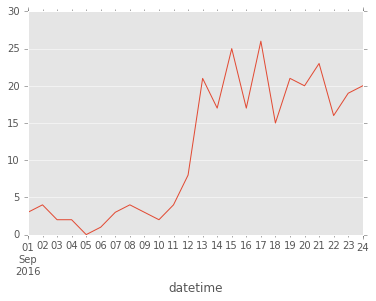

In [97]:
queens_cyclists_092016['UNIQUE KEY'].resample('D').count().plot()

In [99]:
queens_cyclists_092016['UNIQUE KEY'].resample('D').count().sort_values(ascending=False)

datetime
2016-09-17    26
2016-09-15    25
2016-09-21    23
2016-09-19    21
2016-09-13    21
2016-09-24    20
2016-09-20    20
2016-09-23    19
2016-09-16    17
2016-09-14    17
2016-09-22    16
2016-09-18    15
2016-09-12     8
2016-09-11     4
2016-09-08     4
2016-09-02     4
2016-09-09     3
2016-09-07     3
2016-09-01     3
2016-09-10     2
2016-09-04     2
2016-09-03     2
2016-09-06     1
2016-09-05     0
Name: UNIQUE KEY, dtype: int64

# What did September look like last year for Queens?

In [100]:
queens_cyclists_092015 = queens_cyclists_2015["2015-09"]

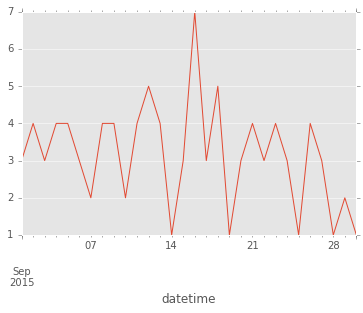

In [101]:
queens_cyclists_092015['UNIQUE KEY'].resample('D').count().plot()

In [103]:
queens_cyclists_092015['UNIQUE KEY'].resample('D').count().sort_values(ascending=False)

datetime
2015-09-16    7
2015-09-18    5
2015-09-12    5
2015-09-13    4
2015-09-02    4
2015-09-26    4
2015-09-04    4
2015-09-05    4
2015-09-23    4
2015-09-21    4
2015-09-08    4
2015-09-09    4
2015-09-11    4
2015-09-15    3
2015-09-03    3
2015-09-06    3
2015-09-01    3
2015-09-17    3
2015-09-20    3
2015-09-22    3
2015-09-24    3
2015-09-27    3
2015-09-29    2
2015-09-10    2
2015-09-07    2
2015-09-14    1
2015-09-19    1
2015-09-25    1
2015-09-28    1
2015-09-30    1
Name: UNIQUE KEY, dtype: int64

# 2014?

In [104]:
queens_cyclists_092014 = queens_cyclists_2014["2014-09"]

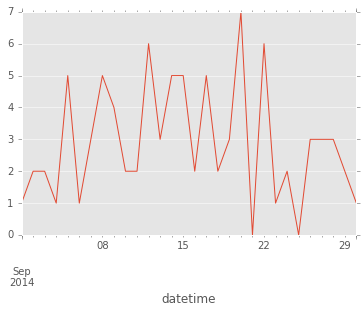

In [105]:
queens_cyclists_092014['UNIQUE KEY'].resample('D').count().plot()

In [106]:
queens_cyclists_092014['UNIQUE KEY'].resample('D').count().sort_values(ascending=False)

datetime
2014-09-20    7
2014-09-12    6
2014-09-22    6
2014-09-15    5
2014-09-08    5
2014-09-14    5
2014-09-17    5
2014-09-05    5
2014-09-09    4
2014-09-19    3
2014-09-13    3
2014-09-07    3
2014-09-26    3
2014-09-27    3
2014-09-28    3
2014-09-03    2
2014-09-16    2
2014-09-29    2
2014-09-24    2
2014-09-02    2
2014-09-11    2
2014-09-10    2
2014-09-18    2
2014-09-04    1
2014-09-30    1
2014-09-06    1
2014-09-23    1
2014-09-01    1
2014-09-21    0
2014-09-25    0
Name: UNIQUE KEY, dtype: int64

# Nothing has been as weird as September of this year. Let's look what areas saw the highest number of accidents. 

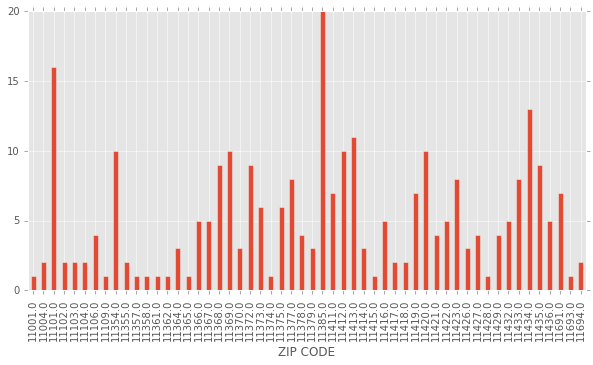

In [108]:
queens_cyclists_092016.groupby('ZIP CODE')['UNIQUE KEY'].count().plot(kind="bar", figsize=(10,5))

# How weird uptick in cycling collisions happened after 9/13. Let's see what areas saw the most collisions from then to now.

In [109]:
weird_burst = queens_cyclists_092016["2016-09-13":"2016-09-24"]

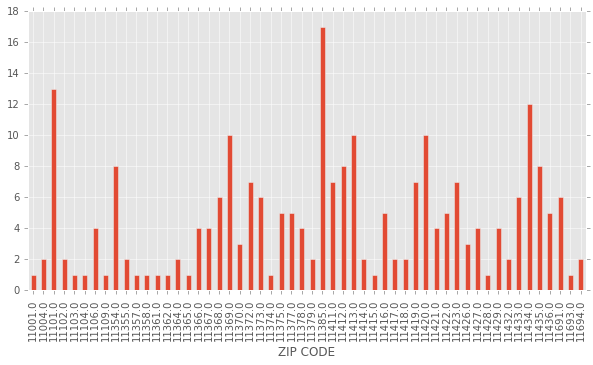

In [110]:
weird_burst.groupby('ZIP CODE')['UNIQUE KEY'].count().plot(kind="bar", figsize=(10,5))

# What had 2014 looked like for zip codes?

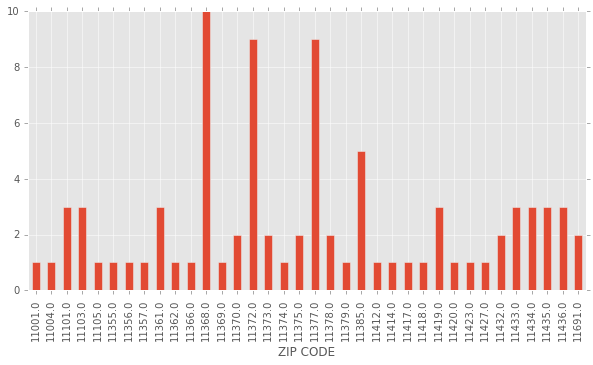

In [119]:
queens_cyclists_092014.groupby('ZIP CODE')['UNIQUE KEY'].count().plot(kind="bar", figsize=(10,5))

# 2015?

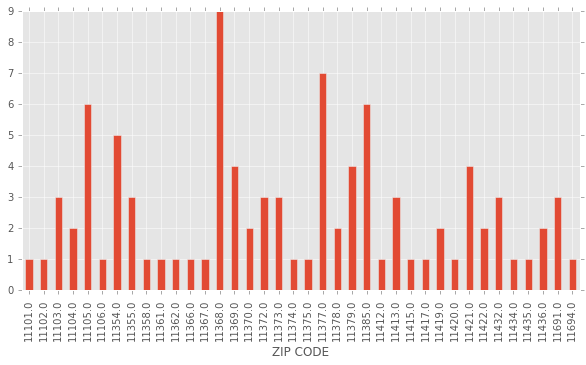

In [120]:
queens_cyclists_092015.groupby('ZIP CODE')['UNIQUE KEY'].count().plot(kind="bar", figsize=(10,5))

In [122]:
(queens_cyclists_092016.groupby('ZIP CODE')['UNIQUE KEY'].count() - queens_cyclists_092015.groupby('ZIP CODE')['UNIQUE KEY'].count()).sort_values(ascending=False)

ZIP CODE
11101.0    15.0
11385.0    14.0
11434.0    12.0
11420.0     9.0
11412.0     9.0
11413.0     8.0
11435.0     8.0
11369.0     6.0
11372.0     6.0
11354.0     5.0
11375.0     5.0
11419.0     5.0
11691.0     4.0
11366.0     4.0
11367.0     4.0
11106.0     3.0
11422.0     3.0
11373.0     3.0
11436.0     3.0
11378.0     2.0
11432.0     2.0
11377.0     1.0
11370.0     1.0
11417.0     1.0
11102.0     1.0
11694.0     1.0
11358.0     0.0
11104.0     0.0
11415.0     0.0
11361.0     0.0
11362.0     0.0
11374.0     0.0
11421.0     0.0
11368.0     0.0
11355.0    -1.0
11379.0    -1.0
11103.0    -1.0
11001.0     NaN
11004.0     NaN
11105.0     NaN
11109.0     NaN
11357.0     NaN
11364.0     NaN
11365.0     NaN
11411.0     NaN
11414.0     NaN
11416.0     NaN
11418.0     NaN
11423.0     NaN
11426.0     NaN
11427.0     NaN
11428.0     NaN
11429.0     NaN
11433.0     NaN
11693.0     NaN
Name: UNIQUE KEY, dtype: float64

# Looks like zip code 11101 (Long Island City) saw the biggest (raw) jump in the number of collisions between 2015 and 2016. How have they generally fared over time? 

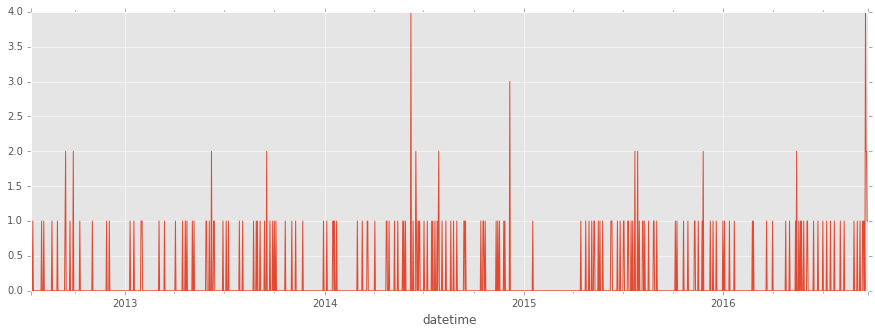

In [123]:
zip11101 = queens_cyclists_bytime[queens_cyclists_bytime["ZIP CODE"] == 11101]
zip11101['UNIQUE KEY'].resample('D').count().plot(figsize=(15,5))

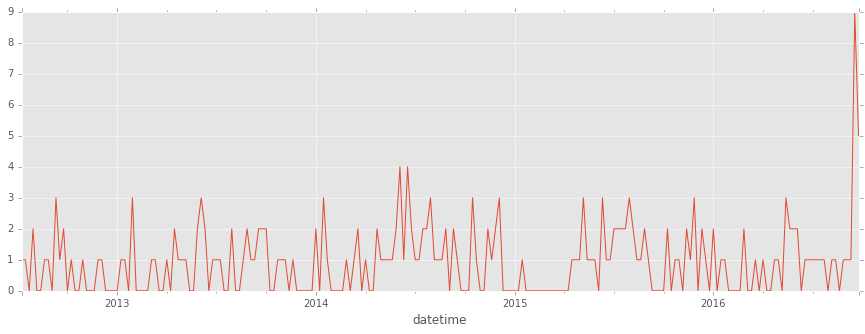

In [124]:
zip11101['UNIQUE KEY'].resample('W').count().plot(figsize=(15,5))

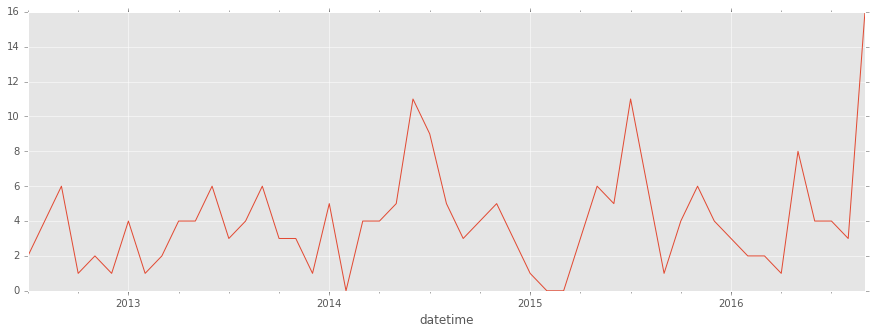

In [125]:
zip11101['UNIQUE KEY'].resample('M').count().plot(figsize=(15,5))

In [126]:
zip11101['UNIQUE KEY'].resample('M').count().sort_values(ascending=False)

datetime
2016-09-30    16
2014-06-30    11
2015-07-31    11
2014-07-31     9
2016-05-31     8
2012-09-30     6
2013-06-30     6
2013-09-30     6
2015-11-30     6
2015-05-31     6
2015-08-31     6
2015-06-30     5
2014-01-31     5
2014-05-31     5
2014-11-30     5
2014-08-31     5
2014-04-30     4
2014-10-31     4
2016-06-30     4
2014-03-31     4
2013-01-31     4
2013-05-31     4
2013-08-31     4
2015-12-31     4
2015-10-31     4
2013-04-30     4
2016-07-31     4
2012-08-31     4
2014-09-30     3
2016-08-31     3
2016-01-31     3
2014-12-31     3
2013-07-31     3
2015-04-30     3
2013-11-30     3
2013-10-31     3
2012-07-31     2
2016-03-31     2
2012-11-30     2
2016-02-29     2
2013-03-31     2
2012-12-31     1
2012-10-31     1
2015-09-30     1
2013-02-28     1
2016-04-30     1
2015-01-31     1
2013-12-31     1
2014-02-28     0
2015-02-28     0
2015-03-31     0
Name: UNIQUE KEY, dtype: int64

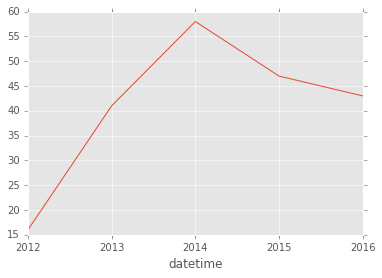

In [128]:
zip11101['UNIQUE KEY'].resample('A').count().plot()

# Looks like zip code 11385 also saw a lot of accidents. How do they usually fare?

In [111]:
zip11385 = queens_cyclists_bytime[queens_cyclists_bytime["ZIP CODE"] == 11385]

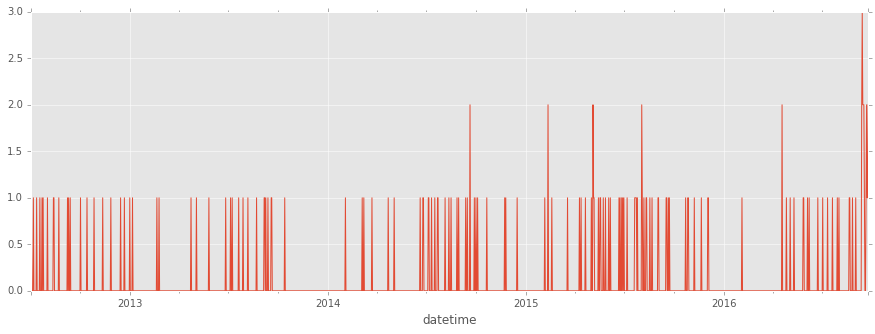

In [115]:
zip11385['UNIQUE KEY'].resample('D').count().plot(figsize=(15,5))

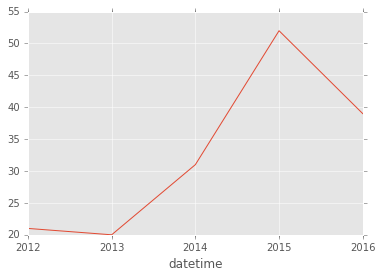

In [129]:
zip11385['UNIQUE KEY'].resample('A').count().plot()

# What does a more "average" zip code look like?

In [116]:
queens_cyclists_092016.groupby('ZIP CODE')['UNIQUE KEY'].count().mean()

5.1111111111111107

In [118]:
queens_cyclists_092016.groupby('ZIP CODE')['UNIQUE KEY'].count().median()

4.0

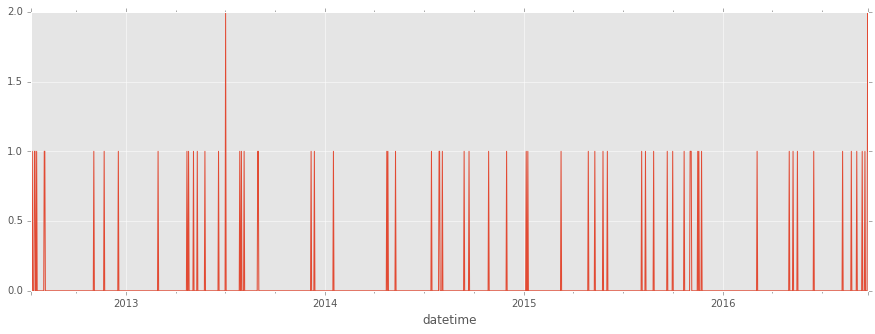

In [117]:
zip11375 = queens_cyclists_bytime[queens_cyclists_bytime["ZIP CODE"] == 11375]
zip11375['UNIQUE KEY'].resample('D').count().plot(figsize=(15,5))

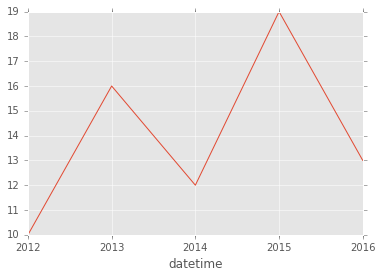

In [130]:
zip11375['UNIQUE KEY'].resample('A').count().plot()

# Number of Collisions with Cyclist Injury or Death in Astoria

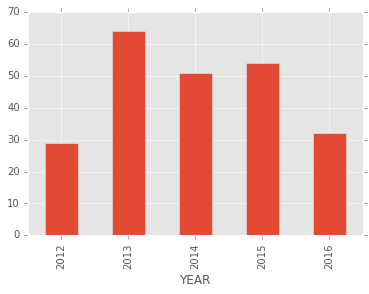

In [38]:
astoria_cyclists.groupby('YEAR')['UNIQUE KEY'].count().plot(kind="bar")

In [45]:
astoria_cyclists_bytime = astoria_cyclists.copy()

In [46]:
astoria_cyclists_bytime['dt_str'] = astoria_cyclists_bytime['DATE'] + " " + astoria_cyclists_bytime['TIME']
astoria_cyclists_bytime['datetime'] = astoria_cyclists_bytime['dt_str'].apply(parse_date)
astoria_cyclists_bytime.index = astoria_cyclists_bytime['datetime']

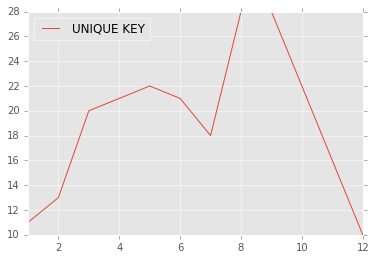

In [47]:
astoria_cyclists_bytime.groupby(by=astoria_cyclists_bytime.index.month).count().plot(y='UNIQUE KEY')

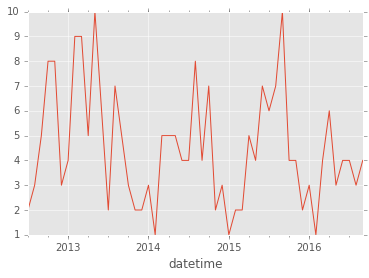

In [48]:
astoria_cyclists_bytime['UNIQUE KEY'].resample('M').count().plot()

For whatever reason, September 2015 seems to have been a particular rough month for cyclists in Astoria in 2015. 

In [49]:
astoria_cyclists_2013 = astoria_cyclists_bytime["2013"]

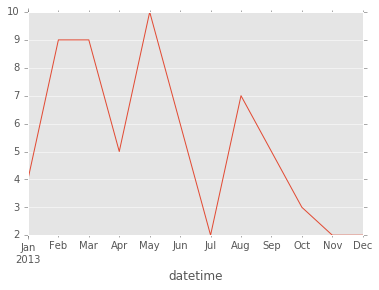

In [51]:
astoria_cyclists_2013['UNIQUE KEY'].resample('M').count().plot()

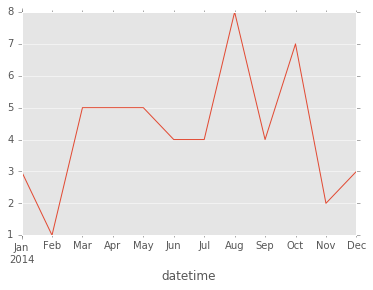

In [52]:
astoria_cyclists_2014 = astoria_cyclists_bytime["2014"]
astoria_cyclists_2014['UNIQUE KEY'].resample('M').count().plot()

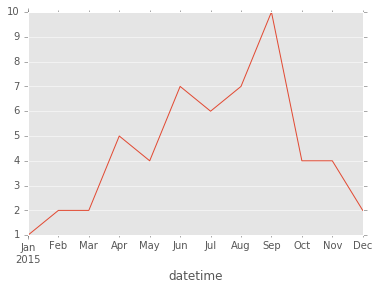

In [53]:
astoria_cyclists_2015 = astoria_cyclists_bytime["2015"]
astoria_cyclists_2015['UNIQUE KEY'].resample('M').count().plot()

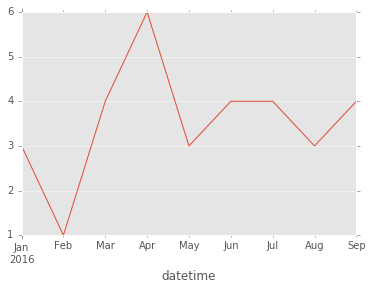

In [54]:
astoria_cyclists_2016 = astoria_cyclists_bytime["2016"]
astoria_cyclists_2016['UNIQUE KEY'].resample('M').count().plot()

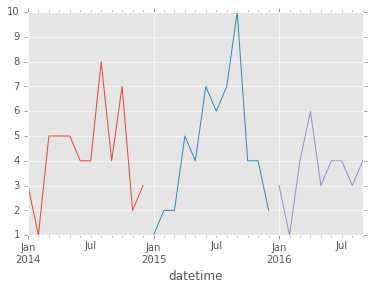

In [55]:
astoria_cyclists_2014['UNIQUE KEY'].resample('M').count().plot()
astoria_cyclists_2015['UNIQUE KEY'].resample('M').count().plot()
astoria_cyclists_2016['UNIQUE KEY'].resample('M').count().plot()

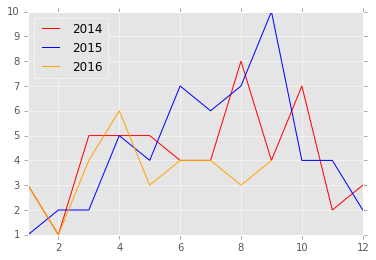

In [59]:
ax = astoria_cyclists_2014.groupby(by=astoria_cyclists_2014.index.month).count().plot(y='UNIQUE KEY', color='red', label="2014")
astoria_cyclists_2015.groupby(by=astoria_cyclists_2015.index.month).count().plot(y='UNIQUE KEY', color='blue', label="2015", ax=ax)
astoria_cyclists_2016.groupby(by=astoria_cyclists_2016.index.month).count().plot(y='UNIQUE KEY', color='orange', label="2016", ax=ax)

# Interestingly, this month Astoria saw its "usual" pattern of collisions -- even though Queens, overall, saw an exceptionally high number of serious collisions. September 2015 was more exceptional for Astoria. 

In [78]:
astoria_cyclists_092015 = astoria_cyclists_2015["2015-09"]

In [79]:
astoria_cyclists_092015['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_values(ascending=False).head(10)

Driver Inattention/Distraction    3
Failure to Yield Right-of-Way     3
Unspecified                       2
Passenger Distraction             1
Lost Consciousness                1
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [80]:
astoria_cyclists_092015['ON STREET NAME'].value_counts().sort_values(ascending=False).head(20)

STEINWAY STREET    2
30 AVENUE          2
23 AVENUE          2
20 AVENUE          2
SHORE BOULEVARD    1
37 STREET          1
Name: ON STREET NAME, dtype: int64

In [81]:
astoria_cyclists_092015['CROSS STREET NAME'].value_counts().sort_values(ascending=False).head(20)

31 STREET    2
34 STREET    1
23 AVENUE    1
25 AVENUE    1
20 AVENUE    1
24 STREET    1
30 AVENUE    1
21 STREET    1
43 STREET    1
Name: CROSS STREET NAME, dtype: int64

In [82]:
astoria_cyclists_092015

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,IS_ASTORIA,YEAR,dt_str,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2015-09-29 23:15:00,09/29/2015,23:15,QUEENS,11105.0,40.777470,-73.917302,"(40.7774702, -73.9173017)",23 AVENUE,24 STREET,NaN,...,3306456,TAXI,BICYCLE,NaN,NaN,NaN,1,2015,09/29/2015 23:15,2015-09-29 23:15:00
2015-09-16 07:10:00,09/16/2015,7:10,QUEENS,11105.0,40.774931,-73.899509,"(40.7749309, -73.8995087)",20 AVENUE,43 STREET,NaN,...,3300517,UNKNOWN,BICYCLE,NaN,NaN,NaN,1,2015,09/16/2015 7:10,2015-09-16 07:10:00
2015-09-13 15:45:00,09/13/2015,15:45,QUEENS,11105.0,40.779729,-73.906304,"(40.7797289, -73.9063041)",20 AVENUE,31 STREET,NaN,...,3296588,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN,1,2015,09/13/2015 15:45,2015-09-13 15:45:00
2015-09-13 20:55:00,09/13/2015,20:55,QUEENS,11103.0,40.767964,-73.911682,"(40.7679637, -73.9116817)",STEINWAY STREET,25 AVENUE,NaN,...,3296584,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,1,2015,09/13/2015 20:55,2015-09-13 20:55:00
2015-09-04 14:00:00,09/04/2015,14:00,QUEENS,11102.0,40.766895,-73.921391,"(40.7668948, -73.9213906)",30 AVENUE,31 STREET,NaN,...,3290915,UNKNOWN,BICYCLE,NaN,NaN,NaN,1,2015,09/04/2015 14:00,2015-09-04 14:00:00
2015-09-01 10:30:00,09/01/2015,10:30,QUEENS,11103.0,40.764643,-73.916588,"(40.7646435, -73.9165884)",37 STREET,30 AVENUE,NaN,...,3289183,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,1,2015,09/01/2015 10:30,2015-09-01 10:30:00
2015-09-12 22:30:00,09/12/2015,22:30,QUEENS,11105.0,40.771085,-73.908219,"(40.7710846, -73.9082189)",STEINWAY STREET,23 AVENUE,NaN,...,3296035,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,1,2015,09/12/2015 22:30,2015-09-12 22:30:00
2015-09-27 16:00:00,09/27/2015,16:00,QUEENS,11103.0,40.765771,-73.918988,"(40.7657706, -73.9189877)",30 AVENUE,34 STREET,NaN,...,3305196,SPORT UTILITY / STATION WAGON,BICYCLE,NaN,NaN,NaN,1,2015,09/27/2015 16:00,2015-09-27 16:00:00
2015-09-05 19:00:00,09/05/2015,19:00,QUEENS,11105.0,40.786041,-73.915236,"(40.7860405, -73.9152363)",SHORE BOULEVARD,20 AVENUE,NaN,...,3291451,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,1,2015,09/05/2015 19:00,2015-09-05 19:00:00


In [83]:
astoria_cyclists_092015['VEHICLE TYPE CODE 1'].value_counts().sort_values(ascending=False).head(20)

PASSENGER VEHICLE                4
SPORT UTILITY / STATION WAGON    3
UNKNOWN                          2
TAXI                             1
Name: VEHICLE TYPE CODE 1, dtype: int64

In [84]:
astoria_cyclists['VEHICLE TYPE CODE 1'].value_counts().sort_values(ascending=False).head(20)

PASSENGER VEHICLE                126
SPORT UTILITY / STATION WAGON     69
UNKNOWN                           10
TAXI                               8
BICYCLE                            3
MOTORCYCLE                         2
BUS                                2
OTHER                              2
VAN                                2
SMALL COM VEH(4 TIRES)             2
LIVERY VEHICLE                     1
PICK-UP TRUCK                      1
Name: VEHICLE TYPE CODE 1, dtype: int64

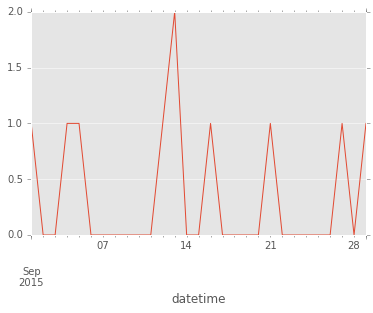

In [87]:
astoria_cyclists_092015['UNIQUE KEY'].resample('D').count().plot()

In [90]:
astoria_cyclists_092015['UNIQUE KEY'].resample('D').count().sort_values(ascending=False)

datetime
2015-09-13    2
2015-09-29    1
2015-09-21    1
2015-09-04    1
2015-09-05    1
2015-09-12    1
2015-09-16    1
2015-09-01    1
2015-09-27    1
2015-09-22    0
2015-09-10    0
2015-09-02    0
2015-09-03    0
2015-09-26    0
2015-09-06    0
2015-09-07    0
2015-09-08    0
2015-09-09    0
2015-09-11    0
2015-09-20    0
2015-09-25    0
2015-09-24    0
2015-09-14    0
2015-09-28    0
2015-09-23    0
2015-09-17    0
2015-09-18    0
2015-09-19    0
2015-09-15    0
Name: UNIQUE KEY, dtype: int64

In [133]:
(serious_astoria_collisions[(serious_astoria_collisions['NUMBER OF CYCLIST KILLED'] > 0) & (serious_astoria_collisions['NUMBER OF CYCLIST INJURED'] > 0)])

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,IS_ASTORIA,YEAR


In [135]:
astoria_cyclists.shape

(230, 31)

In [136]:
queens_cyclists.shape

(3292, 31)

In [137]:
astoria.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'IS_ASTORIA', 'YEAR'],
      dtype='object')

In [138]:
del astoria_cyclists["BOROUGH"]
del astoria_cyclists["CONTRIBUTING FACTOR VEHICLE 3"]
del astoria_cyclists["CONTRIBUTING FACTOR VEHICLE 4"]
del astoria_cyclists["CONTRIBUTING FACTOR VEHICLE 5"]
del astoria_cyclists["VEHICLE TYPE CODE 3"]
del astoria_cyclists["VEHICLE TYPE CODE 4"]
del astoria_cyclists["VEHICLE TYPE CODE 5"]
del astoria_cyclists["IS_ASTORIA"]
del astoria_cyclists["NUMBER OF PEDESTRIANS INJURED"]
del astoria_cyclists["NUMBER OF PEDESTRIANS KILLED"]
del astoria_cyclists["NUMBER OF MOTORIST INJURED"]
del astoria_cyclists["NUMBER OF MOTORIST KILLED"]






In [139]:
astoria_cyclists.to_csv("serious_bike_crashes.csv")